In [59]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]


In [60]:
df = pd.read_csv("GatedPopulations.txt", sep="\t")

In [61]:
df['Name / Description'] = df['Name / Description'].astype(str)
df = df.loc[df['Name / Description']!='nan']

In [62]:
df['Condition'], df['Repeat'] = df['Name / Description'].str.split('_', n=1).str

/var/folders/zt/02d2ncnd3ng81d6rzs8gyrqsz809m_/T/ipykernel_28863/2275020839.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Condition'], df['Repeat'] = df['Name / Description'].str.split('_', n=1).str


In [63]:
df

,Group,Name / Description,All,ENDO and Ach-,ENDO and Ach+,Endoderm,GATA6+,HAND1+,Cells,Unnamed: 9,Condition,Repeat
1,2,Untreated_R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Untreated,R1
2,3,A100_R1,100.0,67.2,32.8,100.0,100.0,0.0,100.0,NaN,A100,R1
3,4,A100B10_R1,100.0,42.1,57.9,100.0,100.0,0.0,100.0,NaN,A100B10,R1
4,5,LDNS_R1,100.0,93.0,7.0,100.0,100.0,0.0,100.0,NaN,LDNS,R1
5,6,LDN24_R1,100.0,89.7,10.3,100.0,100.0,0.0,100.0,NaN,LDN24,R1
6,7,LDN48_R1,100.0,50.5,49.5,100.0,100.0,0.0,100.0,NaN,LDN48,R1
7,8,Untreated_R2,100.0,0.0,100.0,100.0,100.0,0.0,100.0,NaN,Untreated,R2
8,9,A100_R2,100.0,61.6,38.4,100.0,100.0,0.0,100.0,NaN,A100,R2
9,10,A100B10_R2,100.0,32.9,67.1,100.0,100.0,0.0,100.0,NaN,A100B10,R2
10,11,LDNS_R2,100.0,98.9,1.1,100.0,100.0,0.0,100.0,NaN,LDNS,R2


In [78]:
df['+'] = df['ENDO and Ach+']
df['-'] = df['ENDO and Ach-']

In [79]:
data_pos = pd.melt(df, id_vars='Condition', value_vars=['+', '-'])

In [80]:
data_pos

,Condition,variable,value
0,Untreated,+,0.0
1,A100,+,32.8
2,A100B10,+,57.9
3,LDNS,+,7.0
4,LDN24,+,10.3
5,LDN48,+,49.5
6,Untreated,+,100.0
7,A100,+,38.4
8,A100B10,+,67.1
9,LDNS,+,1.1


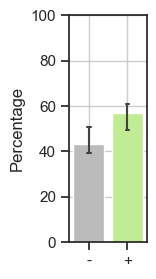

In [98]:
sample = "LDN48"

selected=data_pos.loc[data_pos["Condition"]==sample]
plt.figure(figsize=(1,3), dpi=100)
sns.set_theme(style="ticks")

# Assuming your DataFrame is named df
ax = sns.barplot(data=selected, x='variable', y='value', hue='variable', order=['-', '+'], 
                capsize=0.1, errwidth=1.5, dodge=False, palette=['#c2f988', ingeo_colours[6]])

plt.xlabel(f'')
plt.ylabel(f'Percentage')
plt.grid(zorder=0)  #just add this
plt.ylim(0,100)
ax.get_legend().remove()

plt.savefig(f"{sample}.pdf")

